# 实验四  朴素贝叶斯
- 姓名：
- 学号：
- 专业：

## 亮点
1. 为了增加验证准确率及稳定性采取十折交叉验证
2. 对于中级要求（计算混淆矩阵及模型评估）和高级要求（ROC曲线和AUC值计算）均采用不调用Sklearn和调用Sklearn对比验证，成功验证不调用Sklearn库代码的正确性

### 导入需要的包

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

## 一. 基本要求
a) 采用分层采样的方式将数据集划分为训练集和测试集。 b) 给定编写一个朴素贝叶斯分类器，对测试集进行预测，计算分类准确率。

### 1. 导入数据集 wine.data

In [2]:
f = open('wine.data', 'r')
types = [[], [], []]                      # 按类分的所有数据
test_data = [[], [], []]
train_data = [[], [], []]
data_num = 0                            # 数据总数
test_len = []                           # 测试集里每一类的个数
means = [[], [], []]                      # 每一类的均值
std = [[], [], []]                        # 每一类的标准差
myline = '1'
while myline:
    myline = f.readline().split(',')
    if len(myline) != 14:
        break
    for t in range(len(myline)):
        if t == 0:
            myline[t] = int(myline[t])
        else:
            myline[t] = float(myline[t])
    temp = myline.pop(0)
    types[temp - 1].append(myline)
test_len = [round(len(types[i]) / 10) for i in range(3)]
data_num = sum([len(types[i]) for i in range(3)])

In [6]:
y_test=[]   # 保存测试集属性
y_pred_test=[]   # 保存测试集真实类别
y_pred_score=[]

### 2. 构建朴素贝叶斯分类器

In [7]:
def bayes_classificate(train_data, test_data):
    for i in range(3):
        means[i] = np.mean(train_data[i], axis=0)        # 分别计算三个类别的均值
        std[i] = np.std(train_data[i], axis=0)           # 这里是标准差
    wrong_num = 0
    for i in range(3):
        for t in test_data[i]:                  # 两层循环：从每一类取每一个测试样本
            my_type = []
            y_score=[]
            for j in range(3):
                # 由于数据集中所有的属性都是连续值，连续值的似然估计可以按照高斯分布来计算：
                temp = np.log((2*math.pi) ** 0.5 * std[j])
                temp += np.power(t - means[j], 2) / (2 * np.power(std[j], 2))
                temp = np.sum(temp)
                temp = -1*temp+math.log(len(types[j])/data_num)
                my_type.append(temp)                        # 这里将所有score保存
            pre_type = my_type.index(max(my_type))          # 取分值最大的为预测类别
            my_type.append(i)
            y_pred_score.append(my_type)
            
            y_pred_test.append(pre_type)
            if pre_type != i:                               # 统计错误数
                wrong_num += 1
    return wrong_num

### 3. 分层抽样+十折交叉验证

In [8]:
wrong_num = 0

# 十折交叉，并且对每一类数据分层
for i in range(10): 
    for j in range(3):
        # 分层抽样
        if (i+1)*test_len[j] > len(types[j]):
            test_data[j] = np.mat(types[j][i*test_len[j]:])
            for k in range(len(test_data[j])):
                y_test.append(j)
            train_data[j] = np.mat(types[j][:i*test_len[j]])
        else:
            test_data[j] = np.mat(types[j][i*test_len[j]:(i+1)*test_len[j]])
            for k in range(len(test_data[j])):
                y_test.append(j)
            train_data[j] = np.mat(types[j][:i*test_len[j]]+types[j][(i+1)*test_len[j]:])
            
    # 数据带入朴素贝叶斯分类器
    wrong_num += bayes_classificate(train_data, test_data)
print("分类准确率: "+str(1-wrong_num/data_num))

print("真实标签为：")
print(y_test)
print("预测类别为：")
print(y_pred_test)

分类准确率: 0.9775280898876404
真实标签为：
[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2]
预测类别为：
[0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2

## 二. 中级要求(对于不调用/调用 Sklearn进行对比验证)
使用测试集评估模型，得到混淆矩阵，精度，召回率，F值。

## 不调用Sklearn库计算混淆矩阵及模型评估

### 1. 计算混淆矩阵

In [9]:
def cal_confusion(y_test,y_pred_test):
    confusion = np.zeros((3,3))
    for i in range(len(y_test)):
        confusion[y_test[i]][y_pred_test[i]] += 1
    confusion=np.array(confusion)
    return confusion

### 2. 根据混淆矩阵进行精度、召回率和F值的计算

In [10]:
con_mat = cal_confusion(y_test, y_pred_test)
print("混淆矩阵为：\n",con_mat)

precision = []  #保存精度
recall = []     #保存召回率
F1_score = []  # 保存F值

# 计算精度
for i in range(3):
    precision.append(round(con_mat[i][i]/np.sum(con_mat,axis=0)[i],2))
# 计算召回率
for i in range(3):
    recall.append(round(con_mat[i][i]/np.sum(con_mat,axis=1)[i],2))
# 计算F值
for i in range(3):
    F1_score.append(round(2*precision[i]*recall[i]/(precision[i]+recall[i]),2))
# 计算support值
support = np.sum(con_mat,axis=1)

print("           precision     recall    f1-score    support")
for i in range(3):
    print("{}\t      {}\t   {}\t      {}\t   {}\t".format(i+1,precision[i],recall[i],F1_score[i],int(support[i])))
print("macro avg:    {}\t   {}\t      {}\t   {}\t".format(round(np.sum(precision)/len(types),2),
round(np.sum(recall)/len(types), 2), round(np.sum(F1_score)/len(types), 2), int(np.sum(con_mat))))

混淆矩阵为：
 [[57.  2.  0.]
 [ 0. 68.  2.]
 [ 0.  0. 48.]]
           precision     recall    f1-score    support
1	      1.0	   0.97	      0.98	   59	
2	      0.97	   0.97	      0.97	   70	
3	      0.96	   1.0	      0.98	   48	
macro avg:    0.98	   0.98	      0.98	   177	


## 对比验证：调用Sklearn库实现混淆矩阵计算及模型评估

通过比对可看出不调用Sklearn和调用Sklearn库结果相同，证明了上面计算混淆矩阵及模型评估代码正确性

In [11]:
# 导入Sklearn所需库
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
# 计算混淆矩阵
print("混淆矩阵为：")
print(confusion_mcatrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

混淆矩阵为：
[[57  2  0]
 [ 0 68  2]
 [ 0  0 48]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        59
           1       0.97      0.97      0.97        70
           2       0.96      1.00      0.98        48

    accuracy                           0.98       177
   macro avg       0.98      0.98      0.98       177
weighted avg       0.98      0.98      0.98       177



## 三. 高级要求(对于不调用/调用 Sklearn进行对比验证)
在中级要求的基础上画出三类数据的ROC曲线，并求出AUC值。

## 不调用Sklearn库进行绘制ROC曲线+计算AUC值

### 1. 手写roc_curve()函数

In [13]:
def roc_curve(scores, label):
    # 先算fpr和tpr
    fpr = []
    tpr = []
    p_s = [i for i in scores if i[3] == label]
    n_s = [i for i in scores if i[3] != label]
    postive_num = len(p_s)
    negative_num = len(n_s)
    for i in scores:        
        threshold = i[label]
        fp_num = 0
        tp_num = 0
        for j in p_s:
            if j[label] >= threshold:
                tp_num += 1
        for j in n_s:
            if j[label] >= threshold:
                fp_num += 1
        fpr.append(fp_num / negative_num)
        tpr.append(tp_num / postive_num)
    fpr.append(0)
    tpr.append(0)
    # 再算auc
    auc = 0.0
    for i in p_s:
        for j in n_s:
            if i[label] > j[label]:
                auc += 1
            elif i[label] == j[label]:
                auc += 0.5
    auc /= (postive_num * negative_num)
    return fpr, tpr, auc

### 2. 计算每个类别的fpr、tpr和auc

In [14]:
# 计算每一类的ROC和AUC
fpr = dict()
tpr = dict()
auc = dict()
for i in range(len(types)):
    score_sort = sorted(y_pred_score, key=lambda x: x[i])
    fpr[i], tpr[i], auc[i] = roc_curve(score_sort, i)
    print("第{}类红酒AUC值为{}".format(i, auc[i]))

第0类红酒AUC值为0.9948290721057167
第1类红酒AUC值为0.9337783711615487
第2类红酒AUC值为0.9925710594315246


### 3. 绘制ROC图像

<Figure size 800x640 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC')

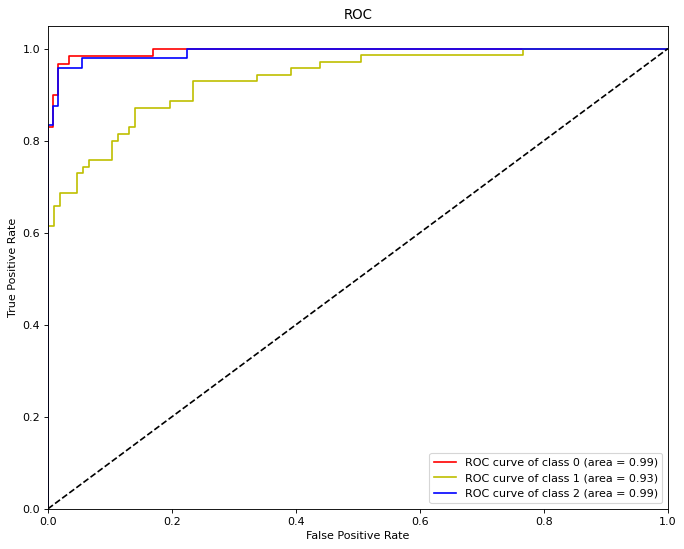

In [15]:
plt.figure(figsize=(10,8),dpi=80)
colors = ['r', 'y', 'b']
for i, color in zip(range(len(types)), colors):
    plt.plot(fpr[i], tpr[i], color=color,label='ROC curve of class {0} (area = {1:0.2f})'.format(i, auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

## 对比验证：调用Sklearn库绘制ROC曲线

### 2. 计算每个类别的fpr、tpr和auc

In [16]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
y_test_binarize = label_binarize(y_test, classes=[0, 1, 2])
y_pred_score_array=np.array(y_pred_score)

# 计算每一类的ROC
fpr_sklearn = dict()
tpr_sklearn = dict()
auc_sklearn = dict()
for i in range(len(types)):
    fpr_sklearn[i], tpr_sklearn[i], _ = roc_curve(y_test_binarize[:, i], y_pred_score_array[:, i])
    auc_sklearn[i] = auc(fpr_sklearn[i], tpr_sklearn[i])
    print("第{}类红酒AUC值为{}".format(i, auc_sklearn[i]))

第0类红酒AUC值为0.9948290721057167
第1类红酒AUC值为0.9337783711615487
第2类红酒AUC值为0.9925710594315247


### 3. 绘制ROC图像

<Figure size 800x640 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC')

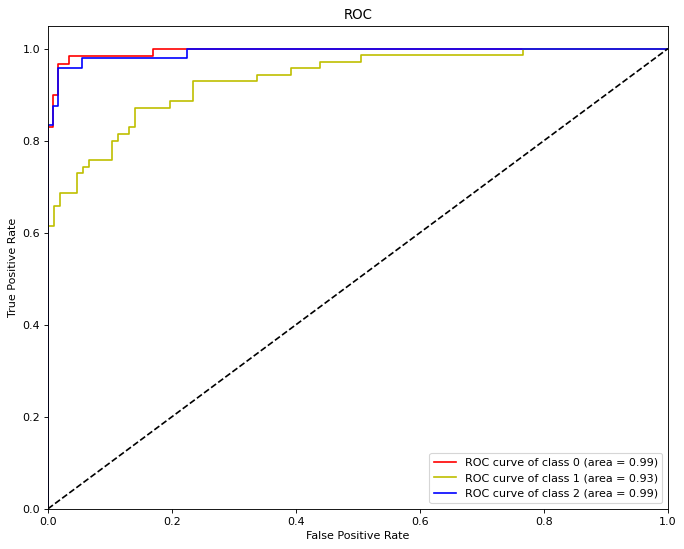

In [17]:
plt.figure(figsize=(10,8),dpi=80)
colors = ['r', 'y', 'b']
for i, color in zip(range(len(types)), colors):
    plt.plot(fpr_sklearn[i], tpr_sklearn[i], color=color,label='ROC curve of class {0} (area = {1:0.2f})'.format(i, auc_sklearn[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

#### 通过比对可看出不调用Sklearn和调用Sklearn库ROC曲线及AUC值计算相同，证明了上面绘制ROC曲线和AUC值计算代码的正确性